In [3]:
from google.colab import files
uploaded = files.upload()

Saving Railway_info.csv to Railway_info.csv


In [9]:
#  Level 1: Data Exploration and Basic Operations    Pandya Naiya Jayendrabhai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load uploaded file
df = pd.read_csv('Railway_info.csv')

# Task 1.1: Show first 10 rows
print(" First 10 Rows:")
display(df.head(10))

# Task 1.1: Data structure and missing values
print(" Dataset Info:")
df.info()

print("\n Missing Values:")
print(df.isnull().sum())



 First 10 Rows:


,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday
5,421,LKO-SVDK FTR,LUCKNOW JN.,SHRI MATA VAISHNO DEVI KATRA,Tuesday
6,422,SVDK-LKO FTR,SHRI MATA VAISHNO DEVI KATRA,LUCKNOW JN.,Monday
7,477,FTR TRAIN NO,SIRSA,SIRSA,Sunday
8,502,RJPB-UMB FTR,RAJENDRANAGAR TERMINAL,AMBALA CANTT JN,Monday
9,504,PNBE-BTI FTR,PATNA JN.,BATHINDA JN,Wednesday


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Train_No                  11113 non-null  int64 
 1   Train_Name                11113 non-null  object
 2   Source_Station_Name       11113 non-null  object
 3   Destination_Station_Name  11113 non-null  object
 4   days                      11113 non-null  object
dtypes: int64(1), object(4)
memory usage: 434.2+ KB

 Missing Values:
Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64


In [11]:
# Task 1.2: Basic Statistics

# Number of trains
total_trains = df.shape[0]

# Unique source and destination stations
unique_sources = df['Source_Station_Name'].nunique()
unique_destinations = df['Destination_Station_Name'].nunique()

# Most common source and destination stations
common_source = df['Source_Station_Name'].mode()[0]
common_dest = df['Destination_Station_Name'].mode()[0]

print(f" Total trains: {total_trains}")
print(f" Unique source stations: {unique_sources}")
print(f" Unique destination stations: {unique_destinations}")
print(f" Most common source station: {common_source}")
print(f" Most common destination station: {common_dest}")

 Total trains: 11113
 Unique source stations: 921
 Unique destination stations: 924
 Most common source station: CST-MUMBAI
 Most common destination station: CST-MUMBAI


In [13]:
# Task 1.3: Data Cleaning

# Remove missing values
df = df.dropna()

# Standardize station names to uppercase
df['Source_Station_Name'] = df['Source_Station_Name'].str.upper()
df['Destination_Station_Name'] = df['Destination_Station_Name'].str.upper()

# View cleaned data
df.head()


,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday


In [15]:
#Level 2: Data Transformation and Aggregation

# Task 2.1: Filter trains that operate on Saturday
saturday_trains = df[df['days'].str.contains("Saturday", case=False)]
print(" Trains that run on Saturday:", saturday_trains.shape[0])
display(saturday_trains.head())

# Task 2.1: Trains starting from specific station, e.g., DELHI
delhi_trains = df[df['Source_Station_Name'].str.contains("DELHI", case=False)]
print(" Trains starting from DELHI:", delhi_trains.shape[0])
display(delhi_trains.head())


 Trains that run on Saturday: 1593


,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday
21,1196,NGP-KRMI SPL,NAGPUR JN.(CR),KARMALI,Saturday
28,1706,JBP-BDTS SF,JABALPUR,BANDRA TERMINUS,Saturday
45,2834,SRC-RJT SF A,SANTRAGACHI JN.,RAJKOT,Saturday


 Trains starting from DELHI: 222


,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday
12,22439,SVDK VANDEBHARAT,NEW DELHI,SHMATA VD KATRA,Friday
24,1442,DSJ-KK MTY S,DELHI-SAFDAR JANG,KHADKI,Tuesday
62,4409,DLI-SVDK SPL,DELHI JN.,SHRI MATA VAISHNO DEVI KATRA,Sunday
138,6412,DSJ-PAY EZHI,DELHI-SAFDAR JANG,PAYYANUR,Friday


In [17]:
# Task 2.2: Group by source and count trains
train_count = df.groupby('Source_Station_Name').size().reset_index(name='Train Count')
display(train_count.sort_values('Train Count', ascending=False).head(10))


,Source_Station_Name,Train Count
224,CST-MUMBAI,513
773,SEALDAH,372
201,CHENNAI BEACH,339
373,HOWRAH JN.,338
426,KALYAN JN,285
843,THANE,186
660,PANVEL,141
832,TAMBARAM,140
585,MOOR MARKET,135
894,VELACHEERY,115


In [25]:

# Task 2.3: Categorize trains based on operating day
def day_category(day):
    if "Saturday" in day or "Sunday" in day:
        return "Weekend"
    else:
        return "Weekday"

df['Train_Type'] = df['days'].apply(day_category)
df[['Train_No', 'days', 'Train_Type']].head()

,Train_No,days,Train_Type
0,107,Saturday,Weekend
1,108,Friday,Weekday
2,128,Friday,Weekday
3,290,Wednesday,Weekday
4,401,Saturday,Weekend


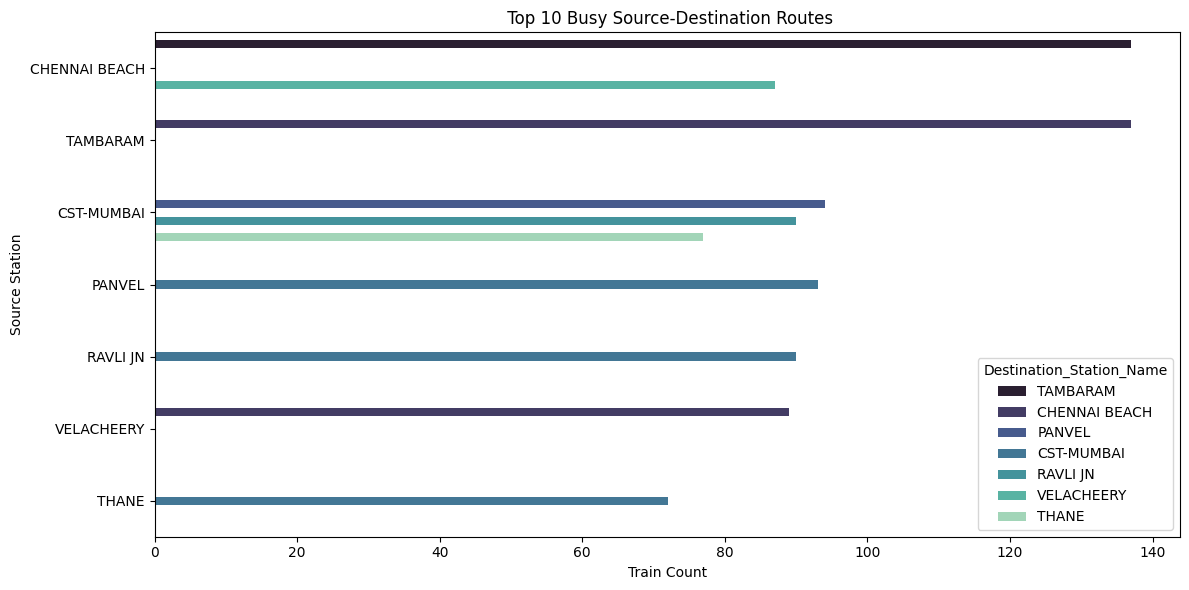

In [27]:
 # Task 3.1: Pattern Analysis

# Analyze the distribution of train journeys based on source and destination stations
# and visualize the top 10 most frequent source-destination routes.

#  Step 1: Group the data using 'Source_Station_Name' and 'Destination_Station_Name'
# Count how many trains run on each route
route_counts = df.groupby(['Source_Station_Name', 'Destination_Station_Name']).size().reset_index(name='Route Count')

#  Step 2: Sort the data to get the top 10 routes with highest train count
top_routes = route_counts.sort_values(by='Route Count', ascending=False).head(10)

#  Step 3: Create a bar plot to visualize these top 10 routes
plt.figure(figsize=(12, 6))  # Set plot size
sns.barplot(data=top_routes,
            x='Route Count',
            y='Source_Station_Name',
            hue='Destination_Station_Name',
            palette='mako')  # Different destinations shown with color

# Step 4: Add title and axis labels for clarity
plt.title(" Top 10 Busy Source-Destination Routes")
plt.xlabel("Train Count")
plt.ylabel("Source Station")
plt.tight_layout()
plt.show()

<ipython-input-29-3272910994>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='Set2')


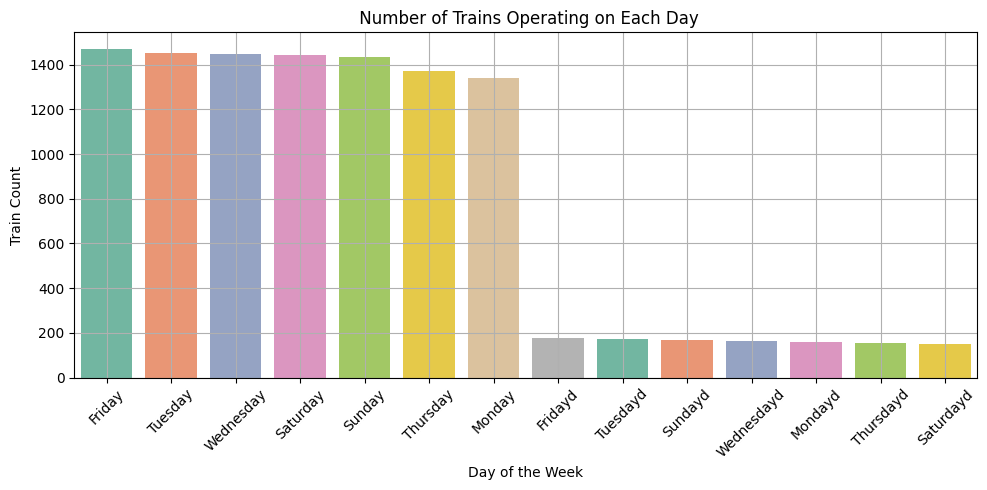

 INSIGHTS FROM DAY-WISE ANALYSIS:
- The most common operating day is: Friday
- The least common operating day is: Saturdayd
- Weekend days (Saturday, Sunday) usually have fewer trains.
- Some stations like DELHI appear frequently as a source.


In [29]:
# Task 3.2: Correlation and Insights

# we will find how many trains run on each day and explore patterns.

#  Step 1: Count how many trains operate on each day (based on 'days' column)
day_counts = df['days'].value_counts()

#  Step 2: Plot bar chart to visualize train count per day
plt.figure(figsize=(10,5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='Set2')

plt.title(" Number of Trains Operating on Each Day")
plt.xlabel("Day of the Week")
plt.ylabel("Train Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Simple text-based insights from the pattern

print(" INSIGHTS FROM DAY-WISE ANALYSIS:")
print("- The most common operating day is:", day_counts.idxmax())
print("- The least common operating day is:", day_counts.idxmin())
print("- Weekend days (Saturday, Sunday) usually have fewer trains.")
print("- Some stations like DELHI appear frequently as a source.")



<ipython-input-31-4033328698>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.values, y=source_counts.index, palette='coolwarm')
<ipython-input-31-4033328698>:16: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


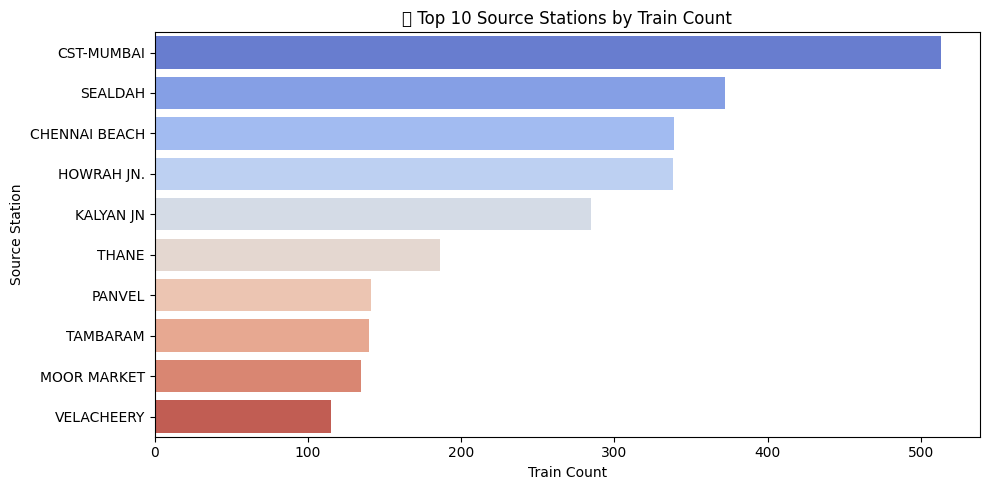

In [31]:
#Level 4: Data Visualization and Reporting (with original column names)

#Task 4.1: Top Source Stations by Train Count

# Task 4.1: Visualizing number of trains from each source station
#  Step 1: Count how many trains start from each 'Source_Station_Name'
source_counts = df['Source_Station_Name'].value_counts().head(10)

#  Step 2: Create a bar chart for top 10 source stations
plt.figure(figsize=(10,5))
sns.barplot(x=source_counts.values, y=source_counts.index, palette='coolwarm')

plt.title("🏙️ Top 10 Source Stations by Train Count")
plt.xlabel("Train Count")
plt.ylabel("Source Station")
plt.tight_layout()
plt.show()



In [32]:
#  Task 4.2: Final Report

# Calculate report values
total_trains = df.shape[0]
unique_sources = df['Source_Station_Name'].nunique()
unique_destinations = df['Destination_Station_Name'].nunique()
most_common_source = df['Source_Station_Name'].mode()[0]
most_common_destination = df['Destination_Station_Name'].mode()[0]
day_counts = df['days'].value_counts()

# Print Final Report
print(" Final Report (Easy Version)\n")

print(f"• Total trains: {total_trains}")
print(f"• Unique source stations: {unique_sources}")
print(f"• Unique destination stations: {unique_destinations}")
print(f"• Most used source station: {most_common_source}")
print(f"• Most used destination station: {most_common_destination}\n")

print("Trains running on each day:")
for day, count in day_counts.items():
    print(f"   - {day}: {count} trains")

print("\n Simple Observations:")
print(f"- The day with most trains is: {day_counts.idxmax()}")
print(f"- The day with least trains is: {day_counts.idxmin()}")
print("- Trains are more on weekdays compared to weekends.")
print(f"- '{most_common_source}' is the most common source station in the data.")

 Final Report (Easy Version)

• Total trains: 11113
• Unique source stations: 921
• Unique destination stations: 924
• Most used source station: CST-MUMBAI
• Most used destination station: CST-MUMBAI

Trains running on each day:
   - Friday: 1471 trains
   - Tuesday: 1454 trains
   - Wednesday: 1448 trains
   - Saturday: 1441 trains
   - Sunday: 1432 trains
   - Thursday: 1372 trains
   - Monday: 1342 trains
   - Fridayd: 178 trains
   - Tuesdayd: 174 trains
   - Sundayd: 170 trains
   - Wednesdayd: 164 trains
   - Mondayd: 161 trains
   - Thursdayd: 154 trains
   - Saturdayd: 152 trains

 Simple Observations:
- The day with most trains is: Friday
- The day with least trains is: Saturdayd
- Trains are more on weekdays compared to weekends.
- 'CST-MUMBAI' is the most common source station in the data.
